In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.10))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.10))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [5]:
training_set = train_datagen.flow_from_directory('/Users/GGS/Desktop/25Nov18/ML/images_data/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 120 images belonging to 2 classes.


In [6]:
test_set = test_datagen.flow_from_directory('/Users/GGS/Desktop/25Nov18/ML/images_data/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 13 images belonging to 2 classes.


In [7]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 80,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = 80)

Epoch 1/20
80/80 [==============================] - 33s 413ms/step - loss: 0.4585 - acc: 0.7562 - val_loss: 0.4721 - val_acc: 0.7692
Epoch 2/20
80/80 [==============================] - 30s 378ms/step - loss: 0.1264 - acc: 0.9564 - val_loss: 0.6068 - val_acc: 0.7692
Epoch 3/20
80/80 [==============================] - 30s 378ms/step - loss: 0.0322 - acc: 0.9939 - val_loss: 1.0292 - val_acc: 0.7692
Epoch 4/20
80/80 [==============================] - 30s 379ms/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.8955 - val_acc: 0.7692
Epoch 5/20
80/80 [==============================] - 31s 383ms/step - loss: 0.0064 - acc: 0.9996 - val_loss: 1.0046 - val_acc: 0.7692
Epoch 6/20
80/80 [==============================] - 30s 378ms/step - loss: 0.0227 - acc: 0.9921 - val_loss: 1.5117 - val_acc: 0.7692
Epoch 7/20
80/80 [==============================] - 30s 380ms/step - loss: 0.0142 - acc: 0.9964 - val_loss: 0.6013 - val_acc: 0.7692
Epoch 8/20
80/80 [==============================] - 30s 378ms/step - 

In [8]:
import numpy as np
from keras.preprocessing import image
test_image = \
    image.load_img('/Users/GGS/Desktop/25Nov18/ML/images_data/Test/ant/image_0039.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

In [9]:
print (result)

[[ 0.]]


In [10]:
test_image1 = \
    image.load_img('/Users/GGS/Desktop/25Nov18/ML/images_data/Test/butterfly/image_0085.jpg'
                   , target_size=(64, 64))
test_image1 = image.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1, axis=0)
result1 = classifier.predict(test_image1)

In [11]:
print(result1)

[[ 1.]]


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

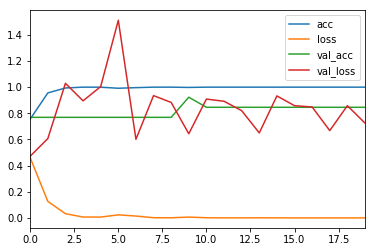

In [13]:
metrics_df = pd.DataFrame(classifier.history.history)
metrics_df.plot()